In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tools.common import to_generation
import sys
import pandas as pd
import os
os.environ['THEANO_FLAGS'] = 'device=cpu,compiledir=.cpu'
sys.path.append('..')
from lightjob.cli import load_db
import numpy as np

In [17]:
db = load_db()
jobs = db.jobs_with(where='jobset83', state='success')
jobs = to_generation(jobs)

In [72]:
d = []
scores = []
l = []
for j in jobs:
    if not j:
        continue
    name = '../jobs/results/{}/stats.csv'.format(j['summary'])
    df = pd.read_csv(name)
    d.append(df['score'].iloc[-1])
    l.append(len(df['score']))
    scores.append(df['score']/1000.)
d = np.array(d)

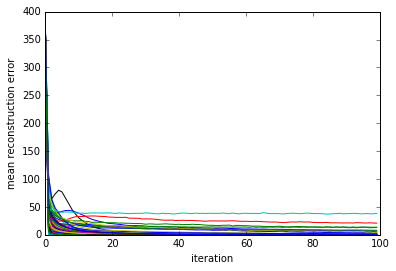

In [89]:
for i in range(100):
    plt.plot(np.array(scores)[i])
plt.xlabel('iteration')
plt.ylabel('mean reconstruction error')